<a href="https://colab.research.google.com/github/maxiperezc/memoscopio/blob/master/HPC/PerezCoto_Maximiliano_ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introducción

El siguiente algoritmo modifica el color de una imagen parametrizada, a su negativo correspondiente. El cálculo del negativo se realiza convirtiendo los 3 canales RGB, que representan a los colores R (*rojo*)-G(*verde*)-B(*azul*), de cada pixel siguiendo la ecuación:

<left>$ Pixel= (255-Red, 255-Green, 255-Blue)$</left>

El objetivo es obtener el negativo de la imagen tanto en forma secuencial como en paralela, para comparar los resultados obtenidos.

---
# 2 Armado del ambiente
Toma la dirección web de una imagen y la deja disponible al contexto del cuaderno.

In [14]:
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://rankingapi.herokuapp.com/car.jpg" #@param {type:"string"}

# Leo la imagen desde internet.
!wget {url_imagen} -O imagen.jpg


--2020-11-21 21:04:18--  https://rankingapi.herokuapp.com/car.jpg
Resolving rankingapi.herokuapp.com (rankingapi.herokuapp.com)... 52.6.114.201, 54.175.223.252, 54.196.166.54, ...
Connecting to rankingapi.herokuapp.com (rankingapi.herokuapp.com)|52.6.114.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55965 (55K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>]  54.65K  --.-KB/s    in 0.003s  

2020-11-21 21:04:18 (18.8 MB/s) - ‘imagen.jpg’ saved [55965/55965]



# 3 Desarrollo en CPU

Imagen: imagen.jpg -RGB- [2656, 4000]
Tiempo en CPU: 85425.764 [ms]
Tiempo Total: 85960.402 [ms]


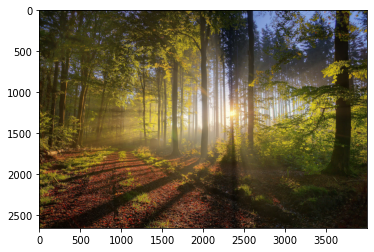

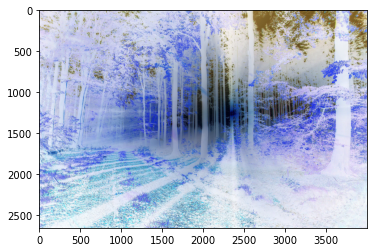

In [12]:
 %matplotlib inline
from datetime import datetime
import  matplotlib.pyplot as plt
import numpy
from PIL import Image 

tiempo_total = datetime.now()
# --------------------------------------------
# Definición de función que transforma el tiempo en milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

try:
  img_nombre = 'imagen.jpg'
  image = Image.open( img_nombre ) 
  # Obtengo los tamaños de la imagen.
  img_alto, img_ancho = image.size
  # Convierto la imagen a array.
  img_cpu = numpy.asarray(image)
  # Genero el array resultado.
  img_neg = numpy.empty_like(img_cpu)

  # Muestro los atributos de la imagen y como se ve antes del proceso.
  print("Imagen: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  
  plt.figure()
  plt.imshow( img_cpu )

  tiempo_img = datetime.now()

  # Convierto la imagen a negativo
  for x in range( 0, img_ancho ):
    for y in range( 0, img_alto ):
      R, G, B = img_cpu[x][y]
      img_neg[x][y] = [255-R, 255-G, 255-B]

  tiempo_img = datetime.now() - tiempo_img

  # Muestro la imagen luego de aplicarle el proceso.
  plt.figure()
  plt.imshow(img_neg)

  tiempo_total = datetime.now() - tiempo_total

  print( "Tiempo en CPU:", tiempo_en_ms(tiempo_img), "[ms]" )
  print( "Tiempo Total:", tiempo_en_ms(tiempo_total), "[ms]" )

except FileNotFoundError:
  print("Error: no se pudo cargar la imagen, verifique el paso anterior.")

---
# 4 Tabla de pasos de ejecución en CPU


Procesador | Función | Detalle
------------|---------|----------
CPU      |  @param                | Lectura de la dirección URL de la imagen (jpg) a procesar.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  try-except            | Atrapa errores de carga en la imagen.
CPU      |  datetime.now()        | Toma el tiempo actual.
CPU      |  Image.open()          | Abre el archivo de la imagen.
CPU      |  numpy.asarray(imagen) | Convierte el formato comprimido JPG a RAW.
CPU      |  numpy.empty_like(()   | Genera el array destino, que tendrá a la imagen resultado. 
CPU      |  print()               | Informa los atributos de la imagen.
CPU      |  plt.imshow            | Muestra la imagen original.
CPU      |  for...for..           | Convierte la imagen a negativo.
CPU      |  plt.imshow            | Muestra la imagen resultado.



------ 

# 5 Desarrollo en GPU

---
# 6 Armado del ambiente
Instala en el cuaderno el módulo CUDA de Python.

In [3]:
!pip install pycuda

     |████████████████████████████████| 1.6MB 17.3MB/s 
     |████████████████████████████████| 71kB 12.2MB/s 
     |████████████████████████████████| 81kB 14.0MB/s 
  Created wheel for pycuda: filename=pycuda-2020.1-cp36-cp36m-linux_x86_64.whl size=621008 sha256=6a1021c1cc96725a637e10b414a081b8b788f5d8e4862470e8069e40bbd010e3
  Stored in directory: /root/.cache/pip/wheels/8f/78/d1/5bb826f81d9d490297a348d818ff3ee6dd6f2075b06dde6ea0
  Created wheel for pytools: filename=pytools-2020.4.3-py2.py3-none-any.whl size=61374 sha256=9a8bbfd1cb5f0dc54c37492ba31eae0ebbb594343de6f5e75fe3d4708a891bb3
  Stored in directory: /root/.cache/pip/wheels/af/c7/81/a22edb90b0b09a880468b2253bb1df8e9f503337ee15432c64
Successfully built pycuda pytools


Toma la dirección web de una imagen y la deja disponible al contexto del cuaderno.

In [6]:
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://rankingapi.herokuapp.com/car.jpg" #@param {type:"string"}

# Leo la imagen desde internet.
!wget {url_imagen} -O imagen.jpg

--2020-11-21 20:48:30--  https://rankingapi.herokuapp.com/car.jpg
Resolving rankingapi.herokuapp.com (rankingapi.herokuapp.com)... 35.169.239.147, 52.73.228.252, 52.73.217.224, ...
Connecting to rankingapi.herokuapp.com (rankingapi.herokuapp.com)|35.169.239.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55965 (55K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>]  54.65K  --.-KB/s    in 0.005s  

2020-11-21 20:48:30 (10.9 MB/s) - ‘imagen.jpg’ saved [55965/55965]



# 7 Desarrollo en GPU

Imagen del filtro: imagen.jpg -RGB- [2656, 4000]
Thread: [ 16 , 16  ], Bloque : [ 166 , 250 ]
Total de Thread: [ 2656 , 4000  ]  =  10624000
Tiempo en GPU  :  0.132 [ms]
Tiempo TOTAL:  544.799 [ms]


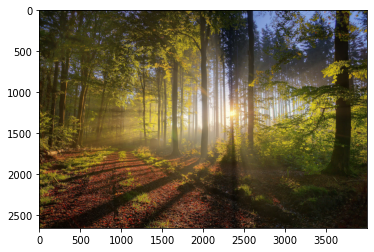

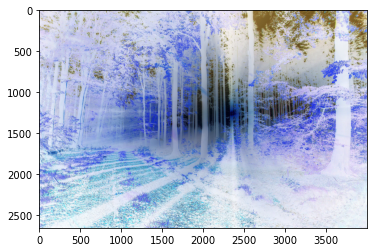

In [13]:
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import numpy
from PIL import Image 

try:
  import pycuda.driver as cuda
  import pycuda.autoinit
  from pycuda.compiler import SourceModule

  tiempo_total = datetime.now()
  # --------------------------------------------
  # Definición de función que transforma el tiempo en  milisegundos 
  tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
  # --------------------------------------------

  img_nombre = 'imagen.jpg'
  image = Image.open( img_nombre ) 
    
  # summarize some details about the image 
  img_alto, img_ancho = image.size 

  # Convierto la imagen comprimida en JPEG/PNG a array
  img_O_cpu = numpy.asarray(image)
  img_R_cpu = numpy.empty_like( img_O_cpu)

  # Reservo los 2 vectores en GPU(3 pixeles usa RGB * (el tamaño del array))
  img_O_gpu = cuda.mem_alloc( img_O_cpu.nbytes )
  img_R_gpu = cuda.mem_alloc( img_R_cpu.nbytes )

  # GPU - Copio la memoria al GPU.
  cuda.memcpy_htod( img_O_gpu, img_O_cpu )
  cuda.memcpy_htod( img_R_gpu, img_R_cpu )

  # CPU - Defino la función kernel que ejecutará en GPU.
  module = SourceModule("""
  __global__ void kernel_img( int ancho, int alto, char *img_O, char *img_R )
  {
    // Calculo las coordenadas del Thread en dos dimensiones.
    int idx = threadIdx.x + blockIdx.x*blockDim.x;
    int idy = threadIdx.y + blockIdx.y*blockDim.y;
    float newR = 0.0;
    float newG = 0.0;
    float newB = 0.0;
    int index = 0;

    // Verifico que los Thread, esten dentro de las dimensiones de la imagen.
    if( idx < ancho && idy < alto )
    {
      index = (idx+(idy*ancho))*3;
      // Calculo el color gris para el pixel a partir de los componentes.
      newR = 255 - (float)img_O[index];     // Componente Rojo del pixel.
      newG = 255 - (float)img_O[index+1];   // Componente Verde del pixel.
      newB = 255 - (float)img_O[index+2];   // Componente Azul del pixel.
      // Escribo el color del pixel.
      img_R[index]   = (char) newR;
      img_R[index+1] = (char) newG;
      img_R[index+2] = (char) newB;
    }
  }
  """) 

  # Muestro los atributos de la imagen y como se ve antes del proceso.
  print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

  # CPU - Genero la función kernel.
  kernel = module.get_function("kernel_img")

  tiempo_img = datetime.now()

  dim_hilo_x = 16
  dim_bloque_x = numpy.int( (img_ancho+dim_hilo_x-1) / dim_hilo_x )

  dim_hilo_y = 16
  dim_bloque_y = numpy.int( (img_alto+dim_hilo_y-1) / dim_hilo_y )

  print( "Thread: [", dim_hilo_x, ",", dim_hilo_y, " ], Bloque : [", dim_bloque_x, ",", dim_bloque_y, "]" )
  print( "Total de Thread: [", dim_hilo_x*dim_bloque_x, ",", dim_hilo_y*dim_bloque_y, " ]", " = ", dim_hilo_x*dim_bloque_x*dim_hilo_y*dim_bloque_y )

  tiempo_img = datetime.now()

  kernel( numpy.int32(img_ancho), numpy.int32(img_alto), img_O_gpu, img_R_gpu, block=( dim_hilo_x, dim_hilo_y, 1 ), grid=(dim_bloque_x, dim_bloque_y,1) )

  tiempo_img = datetime.now() - tiempo_img

  # GPU - Copio el resultado desde la memoria GPU.
  cuda.memcpy_dtoh( img_R_cpu, img_R_gpu )

  # Muestro la imagen Original el filtro.
  plt.figure()
  plt.imshow( img_O_cpu )

  # Muestro la imagen luego de aplicarle el filtro.
  plt.figure()
  plt.imshow( img_R_cpu )

  tiempo_total = datetime.now() - tiempo_total

  print("Tiempo en GPU  : ", tiempo_en_ms( tiempo_img ), "[ms]" )
  print("Tiempo TOTAL: ", tiempo_en_ms( tiempo_total ), "[ms]" )

except ModuleNotFoundError:
  print("Error: debe cambiar el entorno a GPU e instalar CUDA en el paso anterior antes de continuar.")
except FileNotFoundError:
  print("Error: no se pudo cargar la imagen, verifique el paso anterior donde se carga la imagen.")



---
# 8 Tabla de pasos de ejecución en GPU


 Procesador | Función | Detalle
------------|---------|----------
CPU      |  wget url_imagen @param | Lectura de la dirección URL de la imagen (jpg) a procesar.
CPU      | pip install pycuda    | Instala en el cuaderno los driver de CUDA para Python.
CPU      |  matplotlib inline    | Macro de Colab para mostrar imagenes.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  try-except            | Atrapa errores de carga en la imagen y de importación de recursos necesarios.
CPU      |  datetime.now()        | Toma el tiempo actual.
CPU      |  Image.open()          | Abre el archivo de la imagen.
CPU      |  numpy.asarray(imagen) | Convierte el formato comprimido JPG a RAW.
CPU      |  numpy.empty_like(()   | Genera el array destino, que tendrá a la imagen resultado. 
**GPU**  |  cuda.mem_alloc()      | Reserva la memoria para las imagenes en GPU.
**GPU**  |  cuda.memcpy_htod()    | Copio los valores en crudo de las imagenes al GPU.
CPU      |  SourceModule()        | Posee el código del kernel que transforma la imagen a negativo
CPU      |  module.get_function() | convierte el texto del kernel en funcion de Python.
CPU      |  dim_hilo_x, dim_hilo_y| Calcula las dimensiones para la ejecuciòn de 2D.
**GPU**  |  kernel()              | Ejecuta el kernel en GPU, enviando los parametros.
CPU      |  print()               | Informa los atributos de la imagen.
CPU      | cuda.memcpy_dtoh()     | Copia desde la memoria GPU al CPU.
CPU      |  plt.imshow            | Muestra la imagen original.
CPU      |  plt.imshow            | Muestra la imagen en negativo.



---
# 9 Conclusiones

Si bien el ejercicio realizado no presenta una gran diferencia con lo presentado en clase, el cambio en el algoritmo permite proveer la utilidad de entregar negativos de imagenes que son de utilidad en el ambito multimedia.

Se puede apreciar una vez mas, como la ejecución de 2 dimensiones en paralelo aumenta drasticamente la velocidad del procesado de la imagen en cuestión, obteniendose en promedio los siguientes tiempos según dimensiones:


URL | Tamaño      | Pixels    | Tiempo CPU (ms)  | Tiempo GPU (ms)
----|------------|-------------|--------------|------------
https://rankingapi.herokuapp.com/emma.jpg | 211 x 284 |  59.924  | 506,330   | 0.092
https://rankingapi.herokuapp.com/car.jpg | 301 x 600   |  180.600    | 1.727,075    | 0,098
https://rankingapi.herokuapp.com/GiuseppeArcimboldo.jpg | 2541 x 1920 |  4.878.720  | 38.737,438   | 0,112
https://rankingapi.herokuapp.com/hd.jpg | 2656 x 4000 |  10.624.000  | 85.425,764   | 0,132

Queda verificado que entre mayor sea el tamaño o peso de la imagen, mas beneficioso resulta la utilización del algoritmo en paralelo utilizando CUDA.
En el ultimo ejemplo (hd.jpg) son 85 segundos en forma secuencial contra una decima de segundo en forma paralela.


### Pasos mas relevantes

1. Reservar memoria en GPU (cuda.mem_alloc).
2. Copiar datos en memoria GPU (cuda.memcpy_htod).
3. Definir la función que va a ejecutar el Kernel.
4. Calcular las dimensiones.
5. Graficar imagen y su negativo.


---

# 10 Bibliografía

[1] Markdown Syntax Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[2] Introducción a Python: [Página Colab](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb) 

[3] Tutorial Point Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[4] Conversion de una imagen a su negativo [Resource](http://w3.unpocodetodo.info/canvas/negativo.php)
